In [ ]:
#Filter the data to include only weekdays (Monday to Friday)
#and plot a line graph showing the pedestrian counts for each day of the week.

In [7]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'

filename = "city.data"
urlretrieve(url, filename)

city_df = pd.read_csv(filename)

print("City DataFrame:")
display(city_df.head())

City DataFrame:


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [9]:
# Convert 'hour_beginning' to datetime objects, specifying the format
city_df['hour_beginning'] = pd.to_datetime(city_df['hour_beginning'], format='%m/%d/%Y %I:%M:%S %p')

city_df['weekday'] = city_df['hour_beginning'].dt.dayofweek

weekdays_df = city_df[(city_df['weekday'] >= 0) & (city_df['weekday'] <= 4)]

print("\nWeekdays DataFrame:")
display(weekdays_df.head())


Weekdays DataFrame:


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0


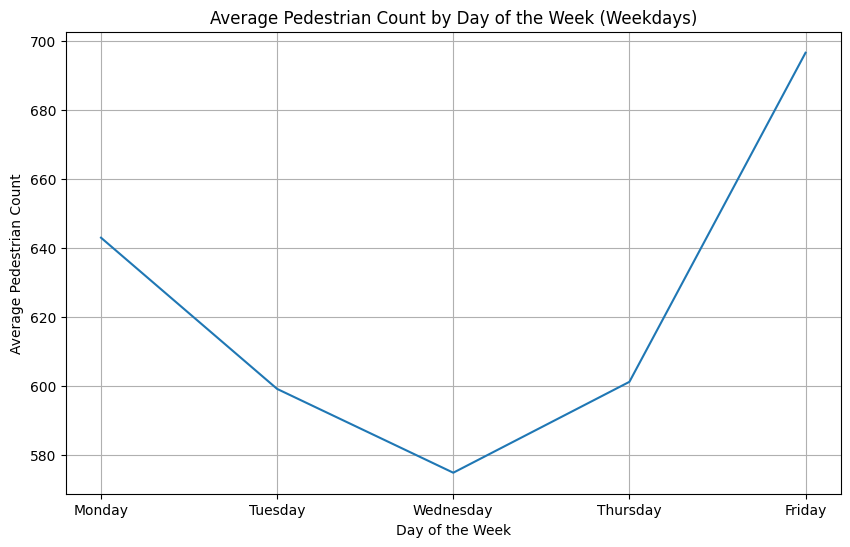

In [15]:
# Group by weekday and calculate the mean pedestrian count
weekday_pedestrian_counts = weekdays_df.groupby('weekday')['Pedestrians'].mean()

weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
x_labels = [weekday_names[i] for i in weekday_pedestrian_counts.index]

plt.figure(figsize=(10, 6))
plt.plot(x_labels, weekday_pedestrian_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Count')
plt.title('Average Pedestrian Count by Day of the Week (Weekdays)')
plt.grid(True)
plt.show()

In [17]:
#Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different
#weather conditions influence pedestrian activity in that year. Sort the pedestrian count data
#by weather summary to identify any correlations( with a correlation matrix) between
#weather patterns and pedestrian counts for the selected year.


In [22]:
city_df_2019 = city_df[city_df['hour_beginning'].dt.year == 2019]

weather_pedestrian_counts_2019 = city_df_2019.groupby('weather_summary')['Pedestrians'].mean().sort_values(ascending=False)

print("\nAverage Pedestrian Count by Weather Summary in 2019:")
display(weather_pedestrian_counts_2019)

correlation_matrix_2019 = city_df_2019[['Pedestrians', 'Towards Manhattan', 'Towards Brooklyn', 'temperature', 'precipitation']].corr()
print("\nCorrelation Matrix (2019):")
display(correlation_matrix_2019)


Average Pedestrian Count by Weather Summary in 2019:


,Pedestrians
weather_summary,
partly-cloudy-day,1574.093627
clear-day,1382.183298
wind,679.000000
cloudy,543.225041
rain,229.822076
snow,222.631579
fog,212.409091
sleet,178.250000
partly-cloudy-night,52.765922



Correlation Matrix (2019):


,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation
Pedestrians,1.000000,0.989069,0.991341,0.358757,-0.105432
Towards Manhattan,0.989069,1.000000,0.961141,0.356150,-0.104927
Towards Brooklyn,0.991341,0.961141,1.000000,0.354475,-0.103942
temperature,0.358757,0.356150,0.354475,1.000000,0.001911
precipitation,-0.105432,-0.104927,-0.103942,0.001911,1.000000


In [23]:
#Implement a custom function to categorize time of day into morning, afternoon, evening, and night,
#and create a new column in the DataFrame to store these categories. Use this new column to
#analyze pedestrian activity patterns throughout the day.

In [24]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

city_df['time_of_day'] = city_df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

time_of_day_pedestrian_counts = city_df.groupby('time_of_day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

print("\nAverage Pedestrian Count by Time of Day:")
display(time_of_day_pedestrian_counts)


Average Pedestrian Count by Time of Day:


,Pedestrians
time_of_day,
Morning,529.699338
Afternoon,1749.484305
Evening,908.873318
Night,50.086680
